Have obtained the tf/idf matrix, we can now train the model

In [1]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearnex import patch_sklearn 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)
#improve performance of SCM
patch_sklearn()

2023-01-06 16:02:51,822 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-06 16:02:51,829 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df_y = df_labels[gl.edInput]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

In [3]:
t = time.time()
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
save_pickle_object(classifier, gl.pkl_classifier_SVM)


train time: 103.06883001327515
2023-01-06 16:04:35,127 | INFO : Saving pickle file from: pickle\pkl_classifier_SVM.pkl


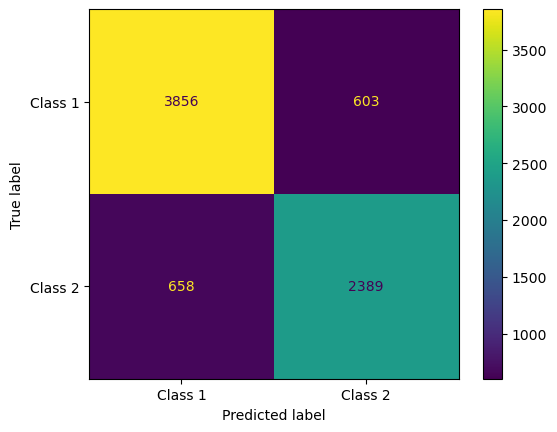

              precision    recall  f1-score   support

     Class 1       0.85      0.86      0.86      4459
     Class 2       0.80      0.78      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.83      0.82      0.83      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [4]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

In [5]:
t = time.time()
classifier = SVC(kernel='linear', class_weight="balanced")
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
save_pickle_object(classifier, gl.pkl_classifier_balanced_SVM)

train time: 77.40979838371277
2023-01-06 16:06:01,446 | INFO : Saving pickle file from: pickle\pkl_classifier_balanced_SVM.pkl


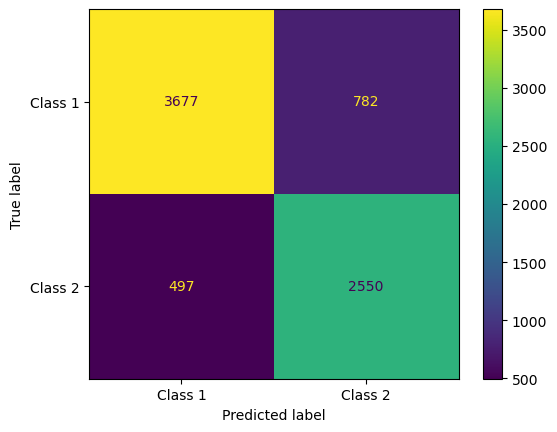

              precision    recall  f1-score   support

     Class 1       0.88      0.82      0.85      4459
     Class 2       0.77      0.84      0.80      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.83      0.83      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [6]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

The results are very similar to the baseline solution. There is no overall improvement in using class-weight = "balanced".

Now try bigrams, trigrams, stemming and lemmatization

2023-01-06 16:06:09,246 | INFO : Calculating for Bigram...
2023-01-06 16:06:09,246 | INFO : Loading pickle file from: pickle\pkl_X_bigram_tfidf.pkl
train time: 114.1236674785614
2023-01-06 16:08:15,095 | INFO : Results for Bigram.


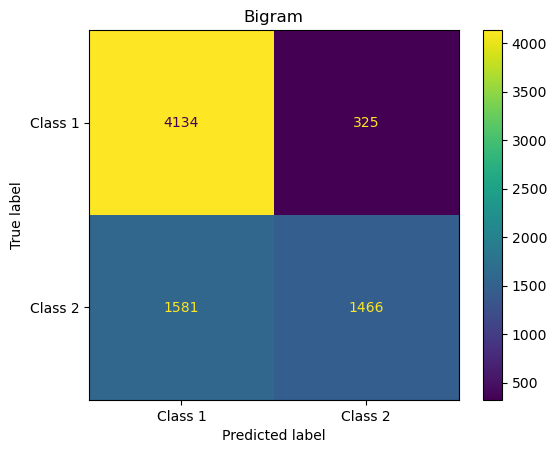

              precision    recall  f1-score   support

     Class 1       0.72      0.93      0.81      4459
     Class 2       0.82      0.48      0.61      3047

    accuracy                           0.75      7506
   macro avg       0.77      0.70      0.71      7506
weighted avg       0.76      0.75      0.73      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.47.
2023-01-06 16:08:15,283 | INFO : Calculating for Trigram...
2023-01-06 16:08:15,284 | INFO : Loading pickle file from: pickle\pkl_X_trigram_tfidf.pkl
train time: 107.76987314224243
2023-01-06 16:10:13,082 | INFO : Results for Trigram.


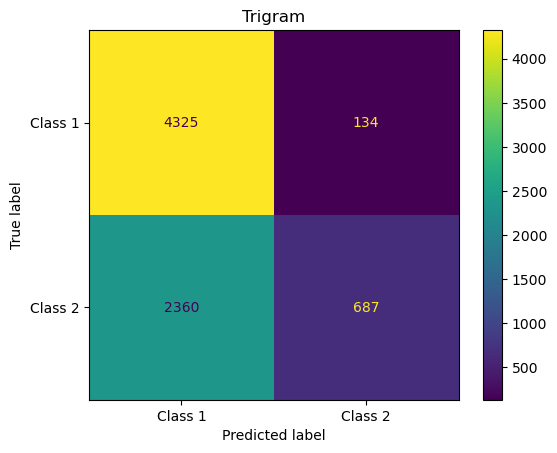

              precision    recall  f1-score   support

     Class 1       0.65      0.97      0.78      4459
     Class 2       0.84      0.23      0.36      3047

    accuracy                           0.67      7506
   macro avg       0.74      0.60      0.57      7506
weighted avg       0.72      0.67      0.61      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.31.
2023-01-06 16:10:13,247 | INFO : Calculating for Stemming...
2023-01-06 16:10:13,248 | INFO : Loading pickle file from: pickle\pkl_X_stem_tfidf.pkl
train time: 54.843037128448486
2023-01-06 16:11:15,320 | INFO : Results for Stemming.


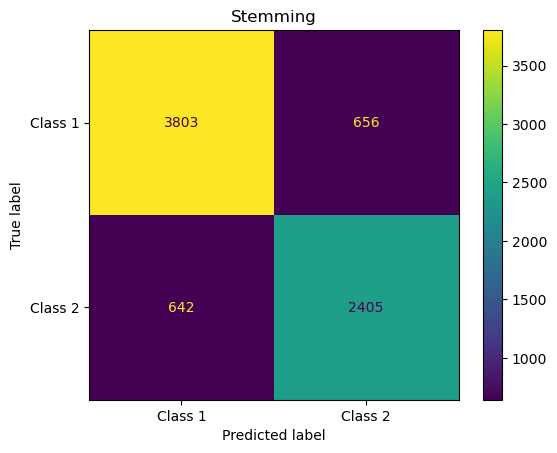

              precision    recall  f1-score   support

     Class 1       0.86      0.85      0.85      4459
     Class 2       0.79      0.79      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.64.
2023-01-06 16:11:15,483 | INFO : Calculating for Lemmatization...
2023-01-06 16:11:15,485 | INFO : Loading pickle file from: pickle\pkl_X_lem_tfidf.pkl
train time: 59.19778490066528
2023-01-06 16:12:21,777 | INFO : Results for Lemmatization.


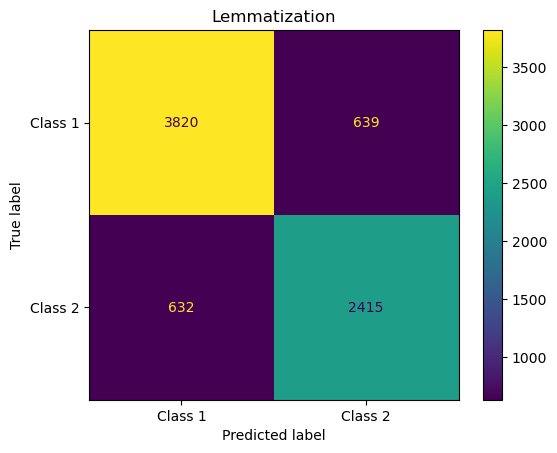

              precision    recall  f1-score   support

     Class 1       0.86      0.86      0.86      4459
     Class 2       0.79      0.79      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [7]:
pickle_input = [(gl.pkl_X_bigram_tfidf, "Bigram"), (gl.pkl_X_trigram_tfidf, "Trigram"), (gl.pkl_X_stem_tfidf, "Stemming"), (gl.pkl_X_lem_tfidf, "Lemmatization")]
for pkl, title in pickle_input:
    logging.info(f"Calculating for {title}...")
    X_tfidf = load_pickle_object(pkl)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)
    t = time.time()
    classifier = SVC(kernel='linear', random_state=42)
    classifier.fit(X_train, y_train)
    training_time = time.time() - t
    print(f"train time: {training_time}" )
    y_pred = classifier.predict(X_test)
    logging.info(f"Results for {title}.")
    display_metrics(y_test, y_pred, title)

The results are remarkably similar to the baseline logistic regression model. The bigram results were poor, the trigram results even worse.<br/>
The stemming does not improve the results, whilst the lemmatization gives a small improvement.